# Reading EDF Files

#### Installing all necessary packages

In [6]:
#pip install SimpleITK

In [7]:
#pip install torch

In [8]:
#pip install pyEDFlib

In [5]:
#!pip install gdown

### Getting the EDF Files from Google Drive

In [3]:
import pyedflib as plib
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import gdown
import os

os.makedirs("data", exist_ok=True)

file_id = "18w94CA-a1U8YLxOFtlZido10BUynOGjq"
output = "data/EEGData.zip"

url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=18w94CA-a1U8YLxOFtlZido10BUynOGjq
From (redirected): https://drive.google.com/uc?id=18w94CA-a1U8YLxOFtlZido10BUynOGjq&confirm=t&uuid=2c9fac37-019c-4557-9ebf-03f6a7addd31
To: /home/jovyan/MasterThesis/data/EEGData.zip
100%|██████████| 4.34G/4.34G [00:20<00:00, 207MB/s]


'data/EEGData.zip'

In [20]:
import zipfile
import os

#create the data folder if it doesn't exist
os.makedirs("data", exist_ok=True)

#Unzip the file
with zipfile.ZipFile("data/EEGData.zip", "r") as zip_ref:
    zip_ref.extractall("data/")

### Using EDF Reader to extract signals from EDF files

In [61]:
edf_path = "data/eeg24.edf"
f = plib.EdfReader(edf_path)

In [62]:
n_channels = f.signals_in_file
signal_labels = f.getSignalLabels()
sample_rate = f.getSampleFrequency(0)
duration = f.getFileDuration()
n_samples = int(duration * sample_rate)

# Read Signals
signals = np.zeros((n_channels, n_samples))
for i in range(n_channels):
    signals[i, :] = f.readSignal(i)

f.close()

#### Plotting the EEG Data 

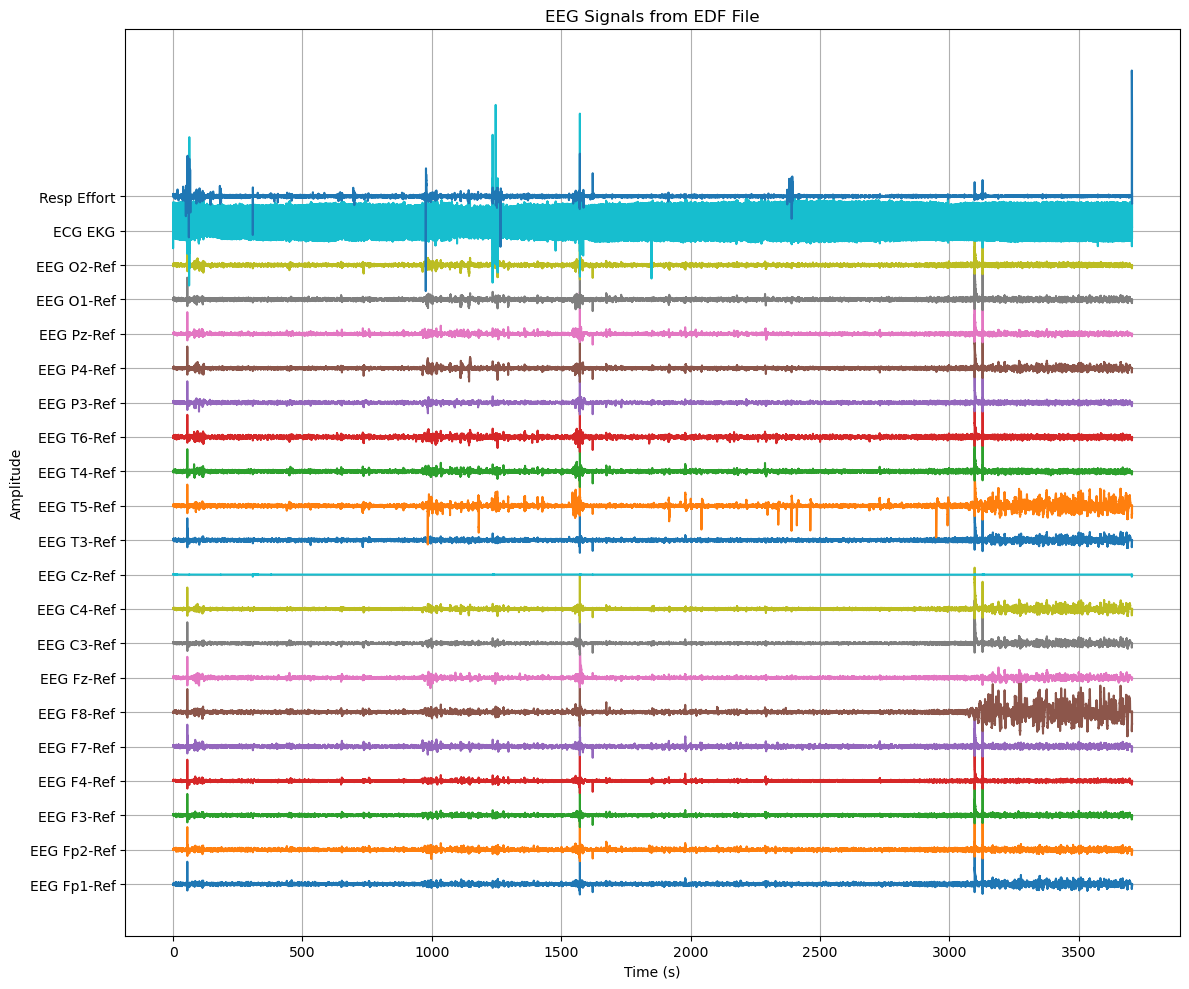

In [63]:
# Time vector
times = np.linspace(0, duration, n_samples)

# Plotting
plt.figure(figsize=(12,10))
offset = 1500 # Vertical offset between signal

for i in range(n_channels):
    plt.plot(times, signals[i] + i*offset, label = signal_labels[i])
    
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Signals from EDF File')
plt.yticks(np.arange(n_channels)*offset, signal_labels)
plt.grid(True)
plt.tight_layout()
plt.show()